In [65]:
# Import general
import pandas as pd
import numpy as np
import array

# Import para GUI
import tkinter as tk

# Import para mapa
from matplotlib import pyplot
from matplotlib import colors
import pickle

#Import para generar ruta
import heapq
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Import para clases
from abc import ABC

# Import para comprobar ruta
import copy

# Import para generar pedido
import random
from math import sqrt
from numpy import vectorize

# Import para Recopilar datos
from pathlib import Path


In [66]:
# Clases

class Robot(ABC):
    def __init__(self, ID: int, vel: float):
        self._ID = ID  # ID del robot
        self._vel: float = vel  # Velocidad del robot
        self._pos = []  # Posición en matriz array, es un vector
        self._pedidos: int = 0  # Número de pedidos que ha realizado
        self._numpicks: int = 0  # Número de picks realizados
        self._picks = []  # Vector de posiciones de picks del robot
        self._ruta = []  # Array de Arrays

        self._proceso: int = 0  # Proceso que se encuentra el robot
        # 0: espera, 1: movimiento, 2: llegada a pick sin humano, 3: humano haciendo picking, 4: yendo a descarga, 5: descarga
        #Asumimos que no tarda nada en descargar y que una vez que llega a descarga ya está disponible para hacer otra mision

        self._dist: float = 0.0  # Distancia recorrida por el robot
        self._dist_metros: float = 0.0  # Distancia recorrida en metros (1 casilla = 1.3 metros)
        self._intersec: int = 0  # Intersecciones entre robots encontradas
        self._tiempoespera: float = 0.0  # Tiempo del robot esperando a humano
        self._tsalida: float = 0.0  # Tiempo de salida del robot
        self._misions: int = 0

    def get_ID(self) -> int:
        return self._ID

    def set_ID(self, ID: int):
        self._ID = ID

    def get_vel(self) -> float:
        return self._vel

    def set_vel(self, vel: float):
        if vel > 0:
            self._vel = vel

    def get_pos(self) -> array.array:
        return self._pos

    def set_pos(self, pos):
        self._pos = pos

    def get_pedidos(self) -> int:
        return self._pedidos

    def set_pedidos(self, pedidos):
        if pedidos > 0:
            self._pedidos = pedidos   

    def get_numpicks(self) -> int:
        return self._numpicks

    def set_numpicks(self, numpicks):
        if numpicks > 0:
            self._numpicks = numpicks  

    def get_picks(self):
        return self._picks

    def set_picks(self, picks):
        self._picks = picks

    def get_ruta(self) -> array.array:
        return self._ruta

    def set_ruta(self, ruta):
        if ruta > 0:
            self._ruta = ruta       

    def get_proceso(self) -> int:
        return self._proceso

    def set_proceso(self, proceso: int):
        if proceso >= 0 and proceso <= 3:
            self._proceso = proceso

    def get_dist(self) -> int:
        return self._dist

    def set_dist(self, dist: int):
        if dist >= 0:
            self._dist = dist

    def get_dist_metros(self) -> int:
        return self._dist_metros

    def set_dist_metros(self, dist_metros: int):
        if dist_metros >= 0:
            self._dist_metros = dist_metros

    def get_intersec(self) -> int:
        return self._intersec

    def set_intersec(self, intersec: int):
        if intersec >= 0:
            self._intersec = intersec

    def get_tiempoespera(self) -> float:
        return self._tiempoespera

    def set_tiempoespera(self, tiempoespera: float):
        if tiempoespera > 0:
            self._tiempoespera = tiempoespera

    def get_tsalida(self) -> float:
        return self._tsalida

    def set_tsalida(self, tsalida: float):
        if tsalida > 0:
            self._tsalida = tsalida

    def get_misions(self) -> int:
        return self._misions

    def set_misions(self, misions: int):
        if misions >= 0:
            self._misions = misions


class Humano(ABC):
    def __init__(self, ID: int, vel: float, picktime: float):
        self._ID = ID  # ID del humano
        self._vel: float = 1.0  # Velocidad del humano
        self._pos = (0,0) # Posición del humano en matriz
        self._goal = [] # Posicion del pick al que va el humano
        self._ruta = []  # Array de Arrays
        self._picktime: float = 15.0  # Tiempo que tarda en hacer el pick
        self._procesopick: int = 0  # Cuántos segundos lleva el humano haciendo el pick
        self._dist: float = 0.0 # Distancia recorrida por el humano

        self._proceso: int = 0  # Proceso en el que está el humano
        # 0: parado, 1: yendo a pick, 2: picking

        self._tiempototal: float = 0.0  # Tiempo del humano en el pedido

        self._picks = [] # Posición del siguiente robot al que tiene que ir el humano

    def get_ID(self) -> int:
        return self._ID

    def set_ID(self, ID: int):
        self._ID = ID

    def get_vel(self) -> float:
        return self._vel

    def set_vel(self, vel: float):
        if vel > 0:
            self._vel = vel

    def get_ruta(self) -> array.array:
        return self._ruta

    def set_ruta(self, ruta: array.array):
        self._ruta = ruta

    def get_goal(self):
        return self._goal

    def set_goal(self, goal):
        self._goal = goal

    def get_pos(self):
        return self._pos

    def set_pos(self, pos):
        self._pos = pos

    def get_picktime(self) -> float:
        return self._picktime

    def set_picktime(self, picktime: float):
        if picktime > 0:
            self._picktime = picktime

    def get_dist(self) -> float:
        return self._dist

    def set_dist(self, dist: float):
        if dist > 0:
            self._dist = dist

    def get_proceso(self) -> int:
        return self._proceso

    def set_proceso(self, proceso: int):
        if proceso >= 0 and proceso <= 4:
            self._proceso = proceso

    def get_tiempototal(self) -> float:
        return self._tiempototal

    def set_tiempototal(self, tiempototal: float):
        if tiempototal > 0:
            self._tiempototal = tiempototal

    def get_picks(self) -> array.array:
        return self._ruta

    def set_picks(self, picks: array.array):
        self._picks = picks


In [67]:

map_list = []
vmap = []

#Mapa Cortefiel - Variable = 0

def m_CTF():
    map_CTF = np.ones((64, 121))

    for i in range(map_CTF.shape[1]):
        if (i % 2) == 0:
            map_CTF[:, i] = 0

    map_CTF[:3, :] = 0
    map_CTF[-5:, :] = 0
    map_CTF[-3:, :11] = 1
    map_CTF[25:27, :] = 0
    map_CTF[41:43, :] = 0
    map_CTF[-15:, 29:41] = 0
    map_CTF[11:14, 24] = 1
    map_CTF[45:48, 24] = 1
    map_CTF[11:14, 60] = 1
    map_CTF[11:14, 76] = 1
    map_CTF[9:12, 75] = 0
    map_CTF[14, 75] = 0
    map_CTF[11:13, 77] = 0
    map_CTF[-9:-6, 52] = 1
    map_CTF[-9:-6, 74] = 1
    map_CTF[-6, 70:77] = 0
    map_CTF[11:14, 104] = 1
    map_CTF[45:48, 104] = 1
    map_CTF[9:12, 103] = 0
    map_CTF[14, 103] = 0
    map_CTF[11:13, 105] = 0
    map_CTF[-12:-10, 73] = 0
    map_CTF[46:49, 103] = 0
    map_CTF[43:45, 105] = 0


    map_list = map_CTF.tolist()

    colormap = colors.ListedColormap(["white", "grey"])
    pyplot.imshow(map_list, cmap=colormap)
    pyplot.show()

    map_array = map_CTF

    return map_array, map_list



# Mapa Layout SPF - Variable = 1

def m_SPF():

    map_SPF = np.ones((57, 165), dtype=int)

    for i in range(map_SPF.shape[1]):
        if (i % 2) == 0:
            map_SPF[:, i] = 0

    map_SPF[0, :] = 0  # Fila 0 vacia
    map_SPF[11:13, :] = 0  # Fila gruesa vacia
    map_SPF[30:32, :] = 0  # Fila gruesa vacia
    map_SPF[:, 160:165] = 0  # Columna gruesa final vacia
    map_SPF[53:57, 0:38] = 0  # Zona inferior izquierda vacia
    map_SPF[48:57, 38:42] = 0  #
    map_SPF[43:47, 42:57] = 0  #
    map_SPF[47:57, 43:55] = 1  # Hueco ocupado "exterior"
    map_SPF[48:57, 56:63] = 0  #
    map_SPF[48:50, 63:156] = 0  # Filas que separan la zona de recogida vacias
    map_SPF[48:57, 156:164] = 0  #
    map_SPF[50:57, 63:156] = 1  # Zona de recogida ocupada
    map_SPF[51, 7:10] = 0  # Hueco encima de una escalera
    # Huecos intercalados:
    map_SPF[16:20, 32:37] = 0  # Hueco a
    map_SPF[16:20, 58:63] = 0  # Hueco b
    map_SPF[16:20, 88:93] = 0  # Hueco e
    map_SPF[16:20, 114:119] = 0  # Hueco g
    map_SPF[16:20, 146:151] = 0  # Hueco i
    map_SPF[37:41, 32:37] = 0  # Hueco d
    map_SPF[37:41, 58:63] = 0  # Hueco c
    map_SPF[37:41, 88:93] = 0  # Hueco f
    map_SPF[37:41, 114:119] = 0  # Hueco h
    map_SPF[37:41, 146:151] = 0  # Hueco j
    # Escaleras:
    map_SPF[7:11, 10:12] = 1
    map_SPF[7:11, 38:40] = 1
    map_SPF[7:11, 74:76] = 1
    map_SPF[7:11, 90:92] = 1
    map_SPF[7:11, 118:120] = 1
    map_SPF[7:11, 154:156] = 1
    map_SPF[52:56, 7:10] = 1
    map_SPF[41:45, 38:40] = 1
    map_SPF[42:46, 118] = 1
    # Cuadrados azules derecha:
    map_SPF[2:4, 162:165] = 1
    map_SPF[22:24, 162:165] = 1
    map_SPF[38:40, 162:165] = 1
    map_SPF[53:55, 162:165] = 1
    # Cuadrados azules abajo:
    map_SPF[50:52, 40:43] = 1
    map_SPF[50:52, 56:59] = 1
    # Columnas verdes:
    map_SPF[16:18, 6:9] = 1
    map_SPF[16:18, 33:36] = 1
    map_SPF[16:18, 60:63] = 1
    map_SPF[16:18, 89:92] = 1
    map_SPF[16:18, 116:119] = 1
    map_SPF[16:18, 149:152] = 1
    map_SPF[38:40, 6:9] = 1
    map_SPF[38:40, 33:36] = 1
    map_SPF[38:40, 60:63] = 1
    map_SPF[38:40, 89:92] = 1
    map_SPF[38:40, 116:119] = 1
    map_SPF[38:40, 149:152] = 1

    map_list = map_SPF.tolist()

    colormap = colors.ListedColormap(["white", "grey"])
    pyplot.imshow(map_list, cmap=colormap)
    pyplot.show()

    map_array = map_SPF

    return map_array, map_list


In [68]:
# Función Generar Ruta con algoritmo A*

#https://www.analytics-link.com/post/2018/09/14/applying-the-a-path-finding-algorithm-in-python-part-1-2d-square-grid
 
def heuristic(a, b): 

    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)
 
# path finding function
 
def generar_ruta(array, start, goal):
    neighbors = [(0,1),(0,-1),(1,0),(-1,0)]
    #(1,1),(-1,1),(1,-1),(-1,-1) Quitamos movimientos diagonales
    close_set = set()

    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}

    oheap = []
    heapq.heappush(oheap, (fscore[start], start))

    while oheap:
        current = heapq.heappop(oheap)[1]
        if current == goal:
            data = []

            while current in came_from:

                data.append(current)
                current = came_from[current]
            data = data + [start]
            data = data[::-1]
            return data
        close_set.add(current)

        for i, j in neighbors:

            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current] + heuristic(current, neighbor)

            if 0 <= neighbor[0] < array.shape[0]:

                if 0 <= neighbor[1] < array.shape[1]:                

                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue

                else:

                    # array bound y walls
                    continue

            else:

                # array bound x walls
                continue

            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):

                continue

            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:

                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))
 
    print("No se ha generado ruta")
    return []


In [69]:
# Función Generar Pedido

def generar_pos(section = 0, demanda = 0):

    i = 0
    # i es el valor que establece si el vector es correcto o no 
    # 0: incorrecto, 1: Correcto

    while i == 0:

        if demanda == 0:    # Generación de posición con demanda baja (todo el almacén)
            num1 = random.randint(1, len(map_list)) - 2 # Valor random del eje x
            num2 = random.randint(1, len(map_list[0])) - 2 # Valor random del eje y

        elif demanda == 1:    # Generación de posición con demanda alta (un tercio del almacén)

            num1 = random.randint(1, len(map_list)) - 2
            leny3 = round(len(map_list[0])/3,0) # Hacemos esto para redondearlo a int para que no haya problema para ejecutar el random.randint

            if section == 1:
                num2 = random.randint(0, leny3) - 2 # Establece pedidos sólo en la parte izquierda del almacén
            elif section == 2:
                num2 = random.randint(leny3, 2*leny3) - 2 # Establece pedidos sólo en la parte central del almacén
            elif section == 3:
                num2 = random.randint(2*leny3, 3*leny3) - 2 # Establece pedidos sólo en la parte derecha del almacén

        # Se resta 2 a num1 y num2 para que no se excedan los límites de la matriz cuando se comprueban los cuadrados colindantes
        # Len te cuenta todos los números desde el 1, 
        # para que sea desde el [0] de la matriz se restaría 1 y para que no se exceda cuando se comprueba los cuadrados colindantes se resta 2

        x = 0 
        
        """x es el número de "0" que hay en las 9 posiciones contiguas a la
        selección. Si hay 4 o menos "0", la selección será válida
        (ya que no está en los pasillos). Si hay más de 4 "0" significa que
        está en un pasillo u otro espacio en el que no hay estantería"""

        # Comprueba las 9 casillas contiguas en las que hay "0"

        if vmap[num1 + 1, num2] == 0:
            x = x + 1

        if vmap[num1 + 1, num2 + 1] == 0:
            x = x + 1

        if vmap[num1, num2 + 1] == 0:
            x = x + 1

        if vmap[num1 - 1, num2 + 1] == 0:
            x = x + 1

        if vmap[num1 - 1, num2] == 0:
            x = x + 1

        if vmap[num1 - 1, num2 - 1] == 0:
            x = x + 1

        if vmap[num1, num2 - 1] == 0:
            x = x + 1

        # Comprueba que la posición está libre y hay 4 o menos casillas con "0"
        if x <= 4 and vmap[num1, num2] == 0:
            i = 1
            vector = np.array([num1, num2])

        # Caso en el que la selección no es válida
        if x > 4 or vmap[num1, num2] == 1:
            i = 0

    return (num1,num2)


def generar_pedido(agente, picks, demanda):

    vec = []
    vec_ordenado = []

    if demanda == 0:    # Baja demanda. Los robots se mueven por todo el almacén

        for i in range(0, picks - 1):

            pos = generar_pos()  # Genera una posición aleatoria
            vec.append(pos)   # Añade la posición al vector de picks

    if demanda == 1: # Alta demanda. Los robots se mueven en tres secciones divididas del almacén
        section = random.randint(1, 3)

        for i in range(0, picks - 1):

            pos = generar_pos(section, demanda) # Genera una posición aleatoria dependiendo de demanda
            vec.append(pos)    # Añade la posición al vector de picks
       
    vec.insert(0, agente._pos) # Añade la posición del robot al vector de picks
    vec_ordenado = ordenar_picks(vec)

    for i in range(len(vec_ordenado)):

        agente._picks.append(vec_ordenado[i]) # Ordena la ruta por distancia minima

    #print("posiciones a recoger: ", agente._picks)
    #print("pos", agente._pos)
    generar_siguiente_ruta(agente) # Genera la siguiente ruta

    return agente._picks


# Función que ordena el vector de picks para ejecutar la ruta con la distancia más corta

def ordenar_picks(picks):
    picks_ordenados = []
    picks_ordenados.append(picks[0]) #Añado la posición del robot a la ruta
    picks.pop(0) #Comprobar si esto es correcto

    j = 0

    while len(picks) > 0:

        d_min = 100000

        for i in range (len(picks)):
            d = ((picks[i][0] - picks_ordenados[j][0]) ** 2 + (picks[i][1] - picks_ordenados[j][1]) ** 2)**0.5 
            #Calcula la distancia entre el pick actual y todos los que faltan por asignar para ver cual es el más cercano
            if d < d_min:
                d_min = d
                pos_min = picks[i]
                pos_min_index = i
        j = j + 1

        picks_ordenados.append(pos_min) #Añado el pick más cercano a la ruta
        picks.pop(pos_min_index) #Elimino el pick más cercano del vector de picks

    print("Picks ordenados", picks_ordenados)

    return picks_ordenados


def generar_siguiente_ruta(agente):

    # Se hace para evitar un error dentro de A* "'int' object is not subscriptable" 
    # en la parte return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

    start = (agente._pos[0], agente._pos[1])
    print("Agente picks", agente._picks)
    goal = (agente._picks[1][0], agente._picks[1][1]) # Hay que poner [1] en picks porque en [0] está la posición actual del robot
    
    ruta = generar_ruta(vmap, start, goal) 


    for j in range(len(ruta)-1):
        agente._ruta.append(ruta[j])

    # Añade la posición del pick al vector de ruta
    # se tiene que hacer con un for porque sino añadiría todo el vector en la primera posición de ruta

    return agente._ruta



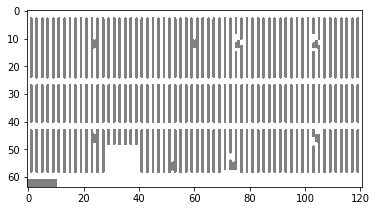

In [70]:
# Declaración variables incluidas en interfaz

#Declaramos mapa dependiendo del introducido en la interfaz
#La variable array del mapa se ha creado antes

xmap = 0 #0: CTF, 1: SPF

if xmap == 0:
    vmap, map_list = m_CTF() #Carga el mapa CTF

elif xmap == 1:
    vmap, map_list = m_SPF() #Carga el mapa SPF

# vmap = variable del mapa

# Declaración de variables introducidas en interfaz

Num_Robots = 1 #Número de robots 
Num_Humanos = 1 #Número de humanos
Mov_Humanos = 0 #Tipo de movimientos de humanos (de momento no lo usamos)

Dias_Alta_Demanda = 1
Dias_Baja_Demanda = 1
Dias_Simulacion = Dias_Alta_Demanda + Dias_Baja_Demanda

S_Simulacion = Dias_Simulacion*60*60*24
S_Alta_Demanda = Dias_Alta_Demanda * 60 * 60 * 24
S_Baja_Demanda = Dias_Baja_Demanda * 60 * 60 * 24

tiempoola =  0.5*60*60*24 # Tiempo entre cada ola

misiones_ola = (1, 1) # Misiones por ola
totes_mision = (1, 3) # Rango de totes por cada mision (pedidos)
picks_tote = (1, 3) # Rango de picks por tote


# Inicialización variables de tiempo

t = 0.0 #tiempo total simulación
tdia = 0.0 #tiempo del dia (0s a 86400s)
zdia = 0 #zona del dia (0 = dia, 1 = tarde, 2 = noche) (0s-28800s, 28800s-57600s, 57600s-86400s)
tola = 0.0 #tiempo de ola (0s a tiempoola s)
tmov = 0.0 #tiempo de movimiento de robots y humanos

tejec = 0.0 #tiempo de ejecución de la simulación (sólo sirve para testear y hacer print, hay que quitar luego)

#Función declarar instancias dependiendo de variables introducidas por el usuario

robots = []
robots = [Robot(x, 0.9) for x in range(0, Num_Robots)]

humanos = []
humanos = [Humano(x, 1, 15) for x in range(0, Num_Humanos)]

for i in range(Num_Humanos): #Inicializamos los humanos en un punto random del mapa
    humanos[i]._pos = (random.randint(0, len(map_list)), random.randint(0, len(map_list[0])))

In [71]:
"""while t <= S_Simulacion:

    if tola > tiempoola: 
        if t < S_Alta_Demanda: #Si estamos en periodo de alta demanda
            demanda = 1

        elif t > S_Alta_Demanda: #Si estamos en periodo de baja demanda
            demanda = 0

        mis = random.randint(misiones_ola[0], misiones_ola[1]) #Número de misiones por ola

        if tdia > 86400: #Si hemos pasado un día
            tdia = 0 #Reinicia el tiempo del dia
            zdia = 0 #Reinicia la zona del dia a mañana

        tola = 0 #Reinicia el tiempo de ola

        k = 0 #Contador de misiones
        j = random.randint(0, Num_Robots - 1) #Contador de robots

        while k < mis:


            #Hay que poner que si no hay robots disponibles, no se pueda generar una nueva mision
            r_disp = 0 #Contador de robots disponibles

            for i in range(Num_Robots):
                if robots[i]._proceso == 0:
                    r_disp += 1
    
            if r_disp == 0:
                print("No hay robots disponibles")
                break

            if robots[j]._proceso == 0:
                
                print("Entro en mision", k+1, "de un total: ", mis)
                totes = random.randint(totes_mision[0], totes_mision[1])
                robots[j]._pedidos = totes #Se asigna el número de totes a la mision
                robots[j]._proceso = 1 #Se pone el proceso a 1 (movimiento)
                robots[j]._tsalida = t #Se asigna el tiempo de salida
                robots[j]._misions = robots[j]._misions + 1 #Se añade una mision al número total
                print("Asigno robot: ", j, "a mision: ", k+1, "con un num de totes de: ", totes)
                k = k + 1

                if xmap == 1: #Inicialización de dónde sale si es SPF
                    robots[j]._pos = (49, 56)

                elif xmap == 0: #Inicialización de dónde sale si es CTFs
                    robots[j]._pos = (63, 11)

                for f in range(totes):
                    picks = random.randint(picks_tote[0], picks_tote[1]) #Se asigna el número de picks a la mision
                    robots[j]._numpicks = robots[j]._numpicks + picks #Se añade el número de picks a la clase
                    result = generar_pedido(robots[j], robots[j]._numpicks, demanda) #Se genera el pedido

            else:
                j = random.randint(0, Num_Robots - 1) #Si el robot está en uso, se elige otro robot

        print("Fin de ola")

        if tmov >= 1.4:  
            #Si el tiempo de movimiento es mayor que 1.4 se ejecuta mover robot y humano (se asume que van a la misma vel)
            #Si se realiza esto cada 1.4 segundos, su velocidad sería 0.9285714285714286

            mov_humano(humanos, robots, xmap) #Movimiento de humanos
            mov_robot(robots, t) #Movimiento de robots
            #print("Movemos humanos y robots")
            tmov = 0 #Reinicia el tiempo de movimiento
            

    #Actualización de variables de tiempo y redondeamos a 1 decimal (ya que a veces se queda en .39999...)

    t = t + 0.7; round(t, 1) #Tiempo total simulación
    tmov = tmov + 0.7; round(tmov, 1) #Tiempo de movimiento de robots y humanos
    tola = tola + 0.7; round(tola, 1) #Tiempo de ola
    tdia = tdia + 0.7; round(tdia, 1) #Tiempo del dia

    tejec = tejec + 0.7; round(tejec, 1)

    if tejec > 10000:

        print("{:.1f}".format(t))
        tejec = 0"""

'while t <= S_Simulacion:\n\n    if tola > tiempoola: \n        if t < S_Alta_Demanda: #Si estamos en periodo de alta demanda\n            demanda = 1\n\n        elif t > S_Alta_Demanda: #Si estamos en periodo de baja demanda\n            demanda = 0\n\n        mis = random.randint(misiones_ola[0], misiones_ola[1]) #Número de misiones por ola\n\n        if tdia > 86400: #Si hemos pasado un día\n            tdia = 0 #Reinicia el tiempo del dia\n            zdia = 0 #Reinicia la zona del dia a mañana\n\n        tola = 0 #Reinicia el tiempo de ola\n\n        k = 0 #Contador de misiones\n        j = random.randint(0, Num_Robots - 1) #Contador de robots\n\n        while k < mis:\n\n\n            #Hay que poner que si no hay robots disponibles, no se pueda generar una nueva mision\n            r_disp = 0 #Contador de robots disponibles\n\n            for i in range(Num_Robots):\n                if robots[i]._proceso == 0:\n                    r_disp += 1\n    \n            if r_disp == 0:\n 

In [72]:
Robot1 = Robot(0, 0.9)

# crea ruta del robot
Robot1._pos = generar_pos()
goal = generar_pos()



print(type(start))

print("start: ", start, "goal: ", goal)


ruta = generar_ruta(vmap, start, goal)

print("Ruta: ", ruta)

<class 'tuple'>
start:  (15, 52) goal:  (54, 74)
Ruta:  [(15, 52), (16, 52), (17, 52), (18, 52), (19, 52), (20, 52), (21, 52), (22, 52), (23, 52), (24, 52), (25, 52), (26, 52), (26, 53), (26, 54), (26, 55), (26, 56), (26, 57), (26, 58), (26, 59), (26, 60), (27, 60), (28, 60), (29, 60), (30, 60), (31, 60), (32, 60), (33, 60), (34, 60), (35, 60), (36, 60), (37, 60), (38, 60), (39, 60), (40, 60), (41, 60), (41, 61), (41, 62), (42, 62), (42, 63), (42, 64), (42, 65), (42, 66), (42, 67), (42, 68), (42, 69), (42, 70), (42, 71), (42, 72), (43, 72), (44, 72), (45, 72), (46, 72), (47, 72), (48, 72), (49, 72), (50, 72), (51, 72), (52, 72), (52, 73), (53, 73), (53, 74), (54, 74)]
